In [67]:
import sys
sys.path.append('/Users/hph/Dropbox/astrophys/juno/CMZoom_scripts/')
import CMZoom_utility as cmz
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from astropy import units as u
import astrodendro
import os
from astropy import wcs
from astrodendro import Dendrogram, pp_catalog
from astrodendro.analysis import PPStatistic
from astropy.table import Table, hstack, Column
from astropy.utils.console import ProgressBar
import reproject
print(np.__version__)
import aplpy
import csv
import reproject
import pandas as pd
%config Completer.use_jedi = False

1.20.2


In [68]:
#### load in catalog and previous mask
path = '/Users/hph/Dropbox/astrophys/CMZoom/cmzoom_catalog/catalog_acc/'
catalog = Table.read(path+'megacatalog_acc.fits')
teamcat = Table.read(path+'megacatalog_team_acc_final_say.fits')
oldmask = fits.open(path+'dendrogram_mask_pruned_rms3e6_k14_dv3_dd1_dp17_pp6_pm2_gal_10-23-19.fits')

In [69]:
newheader = oldmask[0].header.copy()
newdata = oldmask[0].data.copy()
newheader['BUNIT']='index'

In [70]:
### list of leaves to remove due to proximity to edge
ex_index = np.array([374,1067,3258,4005,20803,21252,21336,22434,22648,22947,23297])
### simultaneously remove sgrb2 and sgra*
goodmask = (np.isin(teamcat['index'],ex_index)==False) & (teamcat['mask_num']!=27) #& (teamcat['mask_num']!=9)
### define masking conditions for plotting
SF_all_cond = np.where(goodmask)[0]
SF_final_1cond = np.where((teamcat['SF_final_say']==1)&(goodmask))[0]
SF_final_2cond = np.where((teamcat['SF_final_say']==2)&(goodmask))[0]
SF_final_0cond = np.where((teamcat['SF_final_say']==0)&(goodmask))[0]
SF_final_1or2cond = np.where(((teamcat['SF_final_say']==1)|(teamcat['SF_final_say']==2))&(goodmask))[0]

In [71]:
sgrb2mask = np.where((teamcat['mask_num']==9))[0]
print(sgrb2mask)

[121 123 127 129 140 146 152 160 161 164 165 166 171 174 175 177 178 179
 180 181 182 184 188 189 190 191 193 194 195 196 197 200 202 206 207 208
 209 210 211]


In [72]:
sf_ids = teamcat['index'][SF_final_1cond].data
newdata[np.isin(newdata,sf_ids)==False]=-1



In [73]:
np.isin(newdata,sf_ids).shape

(2800, 19000)

In [74]:
np.isin(sf_ids,[99])

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

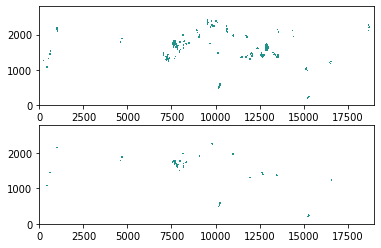

In [75]:
fig, axes = plt.subplots(nrows=2,ncols=1)
ax = axes[0]
ax.contourf(oldmask[0].data,levels=[0,1,1e8])

ax = axes[1]
ax.contourf(newdata,levels=[0,1,1e8])

In [76]:
### make the new mask fits file
hdu = fits.PrimaryHDU(newdata)
hdu.header = newheader
hdul = fits.HDUList(hdu)
hdul.writeto(path+'dendrogram_SF_mask_pruned_rms3e6_k14_dv3_dd1_dp17_pp6_pm2_gal_10-23-19.fits',overwrite=True)
